In [293]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns



In [294]:
lfw_dataset=datasets.fetch_lfw_people(min_faces_per_person=100)
print(lfw_dataset.images.shape)
sam,he,wi=lfw_dataset.images.shape


(1140, 62, 47)


In [295]:
print(lfw_dataset.target_names)


['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [296]:
print(lfw_dataset.target)

[2 3 1 ... 4 2 4]


In [297]:
lfw_dataset.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [298]:
x=lfw_dataset.data
y=lfw_dataset.target
target_names=lfw_dataset.target_names
target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [299]:
nf=pd.DataFrame(data=x)

In [300]:
nf.head()
nf

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,82.666664,87.333336,65.333336,53.333332,97.000000,128.333328,137.666672,145.666672,156.000000,164.000000,...,82.333336,79.000000,74.333336,91.000000,108.333336,109.333336,113.333336,106.333336,140.000000,199.333328
1,52.666668,49.666668,69.333336,92.000000,123.333336,152.666672,155.333328,158.333328,161.666672,165.000000,...,79.333336,101.333336,154.666672,206.666672,220.333328,225.333328,233.333328,235.666672,228.666672,222.333328
2,37.000000,39.000000,41.666668,52.333332,82.666664,118.000000,127.666664,129.333328,138.000000,141.333328,...,62.666668,107.666664,137.333328,117.333336,103.000000,104.333336,106.333336,96.666664,72.000000,59.333332
3,33.666668,31.000000,31.333334,48.333332,74.666664,92.333336,96.000000,98.000000,103.000000,107.666664,...,117.666664,123.333336,123.666664,120.666664,128.666672,146.000000,149.333328,141.000000,129.333328,132.333328
4,170.000000,149.000000,130.666672,145.666672,175.000000,195.333328,204.333328,205.666672,205.666672,210.333328,...,52.666668,63.333332,76.666664,88.333336,95.666664,98.000000,101.666664,103.333336,107.000000,109.666664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,74.000000,73.000000,71.000000,82.000000,119.666664,149.666672,164.666672,174.666672,182.333328,187.000000,...,97.666664,107.666664,124.333336,134.333328,143.000000,158.000000,194.666672,230.000000,237.000000,231.333328
1136,69.000000,64.333336,69.000000,92.666664,120.666664,141.666672,150.000000,154.333328,158.333328,159.000000,...,161.000000,156.000000,146.000000,136.666672,135.666672,141.333328,141.000000,132.666672,117.666664,115.333336
1137,228.333328,224.666672,216.666672,200.333328,196.000000,186.333328,153.666672,112.333336,82.000000,97.000000,...,120.333336,128.333328,129.333328,133.666672,139.333328,144.000000,148.333328,150.333328,145.666672,165.000000
1138,97.000000,118.666664,133.333328,145.000000,147.000000,148.000000,158.333328,165.666672,170.333328,177.000000,...,61.000000,61.666668,68.333336,101.000000,157.666672,195.000000,210.000000,219.333328,210.000000,142.000000


In [301]:
from sklearn.preprocessing import StandardScaler


In [302]:
scaler=StandardScaler()
scaler.fit(nf)

StandardScaler()

In [303]:
scaled_data=scaler.transform(nf)
scaled_data

array([[-0.1985473 , -0.171198  , -0.8414411 , ..., -0.14527534,
         0.37324056,  1.2082139 ],
       [-0.87891686, -1.0475285 , -0.74612206, ...,  1.4891697 ,
         1.4985621 ,  1.4990798 ],
       [-1.2342211 , -1.2956929 , -1.405412  , ..., -0.26743755,
        -0.48978803, -0.5622742 ],
       ...,
       [ 3.1050253 ,  3.0239184 ,  2.764795  , ...,  0.41077283,
         0.44515964,  0.7740229 ],
       [ 0.12651825,  0.5577848 ,  0.778982  , ...,  1.2827576 ,
         1.2616522 ,  0.48315695],
       [-1.1813035 , -0.36507648,  0.23089783, ..., -1.1857597 ,
        -0.9678381 , -1.0133271 ]], dtype=float32)

In [304]:
pca=PCA(n_components=100)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
scaled_data.shape

(1140, 2914)

In [305]:
x_pca.shape

(1140, 100)

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
pca = PCA(n_components=100).fit(x_train)
# as pca.compoments.shape =(100,2194)  so we need to reshape that into original h,w in order to see them s 
eigenfaces = pca.components_.reshape((100, he, wi))
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_test_pca.shape



(342, 100)

In [307]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train_pca, y_train)
pred=kn.predict(x_test_pca)

print(kn.score(x_test_pca,y_test))
target_names=['Colin Powel','Donald Rumsfield','George W Bush','Gerhard Schroeder','Tony Blair']
print(classification_report(pred,y_test,target_names=target_names))


0.5877192982456141
                   precision    recall  f1-score   support

      Colin Powel       0.66      0.61      0.63        87
 Donald Rumsfield       0.38      0.50      0.43        32
    George W Bush       0.70      0.70      0.70       153
Gerhard Schroeder       0.21      0.30      0.25        23
       Tony Blair       0.55      0.38      0.45        47

         accuracy                           0.59       342
        macro avg       0.50      0.50      0.49       342
     weighted avg       0.61      0.59      0.59       342



In [308]:
pca.explained_variance_ratio_ #*100

array([0.17523967, 0.15101787, 0.07389913, 0.0604226 , 0.05314179,
       0.02995695, 0.02546067, 0.02166633, 0.02031626, 0.01925805,
       0.01592713, 0.01575977, 0.01265911, 0.0114485 , 0.01000225,
       0.00986505, 0.00903096, 0.00836704, 0.0082279 , 0.00769988,
       0.00693389, 0.00660042, 0.00616293, 0.0059026 , 0.00573264,
       0.00533909, 0.00513852, 0.00480219, 0.00456651, 0.00441202,
       0.00401213, 0.00386357, 0.00379213, 0.00363865, 0.00354892,
       0.00333295, 0.00330931, 0.00321041, 0.00313438, 0.00295958,
       0.00292058, 0.0028053 , 0.00274346, 0.00258979, 0.00252013,
       0.00248181, 0.00244931, 0.0024026 , 0.00236711, 0.0022762 ,
       0.00223247, 0.00212509, 0.00205532, 0.00203417, 0.00196725,
       0.00192488, 0.00187646, 0.00181051, 0.0017545 , 0.0017354 ,
       0.00170373, 0.00163351, 0.00162867, 0.00159245, 0.00153222,
       0.00152785, 0.00150661, 0.00145158, 0.00142508, 0.0013939 ,
       0.00138353, 0.00135435, 0.0013487 , 0.00132986, 0.00128

In [309]:
req_var=.80
sum=0
cnt=0

for j in pca.explained_variance_ratio_:
  sum=sum+j
  cnt=cnt+1
  if(sum>=req_var):
    print(cnt)
    break

count1=0
ans=0
for i in pca.explained_variance_ratio_:
  ans+=i
  count1=count1+1
  if(count1==100):
    break


print("100 eigen vector explain : ",ans," variance")
print("Eigen vectors required to explain 80 % variance :", cnt)


32
100 eigen vector explain :  0.9225893102702685  variance
Eigen vectors required to explain 80 % variance : 32


In [310]:
#since we have to print 20 eigen faces so i have taken the rows-4 and the coloum=5
def plot_gallery(images, h, w, n_row=4, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        #plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [311]:
x_32=PCA(n_components=31).fit_transform(x)
# split into a training and testing set
x_train_32, x_test_32, y_train, y_test = train_test_split(x_32,y, test_size=0.30)


In [312]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train_32, y_train)
pred=kn.predict(x_test_32)

print(kn.score(x_test_32,y_test))
target_names=['Colin Powel','Donald Rumsfield','George W Bush','Gerhard Schroeder','Tony Blair']
print(classification_report(pred,y_test,target_names=target_names))

0.52046783625731
                   precision    recall  f1-score   support

      Colin Powel       0.69      0.43      0.52        87
 Donald Rumsfield       0.43      0.41      0.42        44
    George W Bush       0.60      0.67      0.64       138
Gerhard Schroeder       0.33      0.41      0.36        32
       Tony Blair       0.33      0.41      0.37        41

         accuracy                           0.52       342
        macro avg       0.47      0.47      0.46       342
     weighted avg       0.54      0.52      0.52       342



Top 20 eigen faces : -
(100, 62, 47)


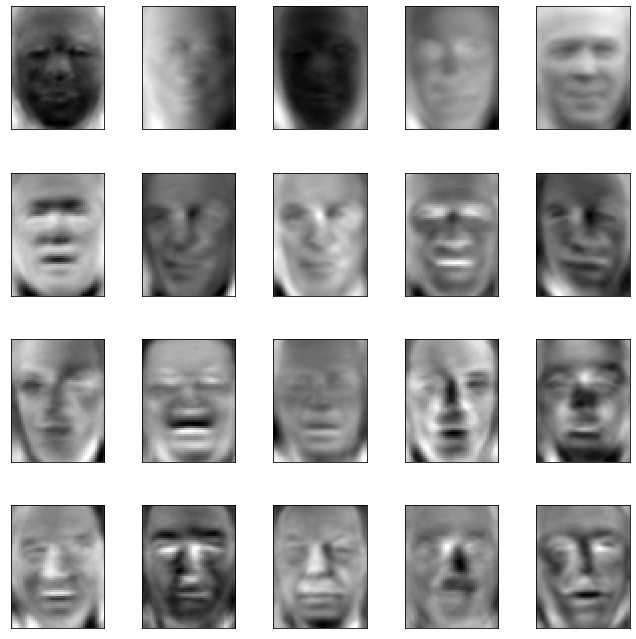

In [313]:
print("Top 20 eigen faces : -")
plot_gallery(eigenfaces,he, wi)
print(eigenfaces.shape)


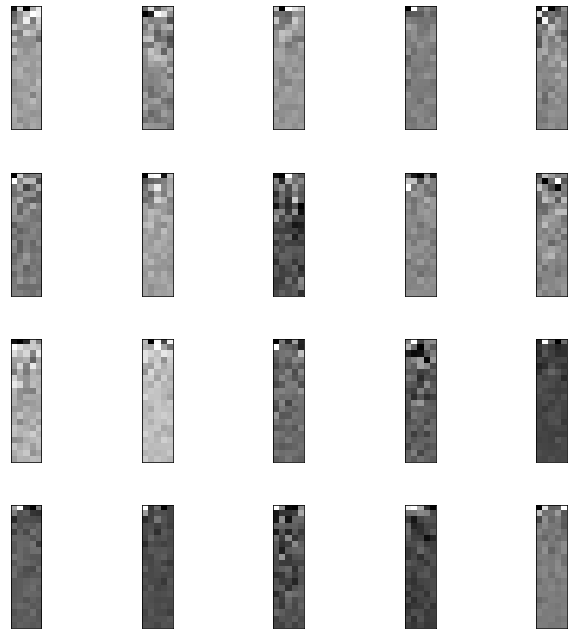

In [314]:
plot_gallery(x_train_pca,20,5)

In [315]:
from sklearn.manifold import TSNE


In [316]:
x_subset=np.array( [x[0]] )
y_subset=np.array([2])
print(x_subset.shape)
for i in range(1,sam):
  if(y[i]==0 or y[i]==1 or y[i]==2 ):
    #print(X[i].shape )
    y_subset=np.append(y_subset, [y[i]],axis=0)
    x_subset=np.append(x_subset, [x[i]],axis=0)
print(x_subset)
print(y_subset)


(1, 2914)
[[ 82.666664  87.333336  65.333336 ... 106.333336 140.       199.33333 ]
 [ 37.        39.        41.666668 ...  96.666664  72.        59.333332]
 [170.       149.       130.66667  ... 103.333336 107.       109.666664]
 ...
 [ 79.        80.333336  89.666664 ...   2.         2.         2.      ]
 [ 47.333332  48.666668  50.       ... 105.666664 110.333336 113.333336]
 [ 97.       118.666664 133.33333  ... 219.33333  210.       142.      ]]
[2 1 1 0 2 0 2 1 0 2 2 2 2 2 2 0 2 0 0 0 2 1 1 0 0 2 1 2 2 0 2 2 2 1 2 0 1
 0 2 2 2 2 2 0 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 1 0 2 2 2 2 2 0 2
 2 0 2 2 1 1 1 2 2 0 2 2 0 1 1 2 2 2 2 2 2 2 2 2 0 0 0 0 1 2 1 2 2 2 2 0 2
 2 0 2 2 2 2 1 0 2 0 1 2 2 0 2 2 0 2 2 1 2 1 1 1 0 2 2 2 0 0 0 2 2 0 2 2 0
 0 2 0 0 2 2 1 2 0 1 2 2 2 1 2 0 1 2 0 1 2 0 0 2 2 2 2 2 2 1 0 2 2 2 0 2 0
 2 0 2 2 1 1 2 0 2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 0 0 2 2 0 2 2 2 2 2 2 1 1
 1 0 2 0 0 0 2 0 0 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 0 2 1 2 1 2 2 0 2
 1 0 2 2 2 2 1 2 2 2 

In [317]:
x_subset_pca= PCA(n_components=100, svd_solver='randomized',
          whiten=True).fit_transform(x_subset)


In [318]:
x_subset_pca_embedding=TSNE(n_components=2).fit_transform(x_subset_pca)
print(x_subset_pca_embedding.shape)


(887, 2)


In [319]:
t1=x_subset_pca_embedding[:,0]
t2=x_subset_pca_embedding[:,1]



In [320]:
df=pd.DataFrame()
df['X']=t1
df['Y']=t2
df['type']=y_subset
df

,X,Y,type
0,-8.069059,-22.858284,2
1,-17.462017,2.932817,1
2,-9.625317,1.085757,1
3,-20.568083,16.845875,0
4,-4.466771,4.682431,2
...,...,...,...
882,20.830677,-13.950844,0
883,-9.548079,-0.929854,1
884,22.273998,29.431580,2
885,-5.821923,-26.094162,0


<AxesSubplot:xlabel='X', ylabel='Y'>

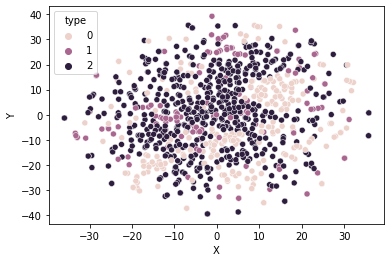

In [321]:
sns.scatterplot(data=df,x='X',y='Y',hue='type')
